In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras import datasets, layers, models

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

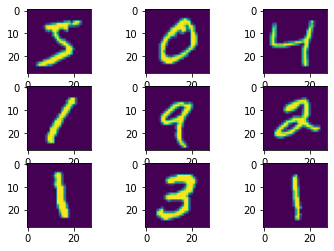

In [6]:
#sample images
for i in range(9):
   plt.subplot(330+1+i)
   plt.imshow(X_train[i])
plt.show()

In [7]:
X_train=X_train.reshape(-1,28,28,1)

In [8]:
X_test=X_test.reshape(-1,28,28,1)

In [9]:
#divide by 255 to normalize it to 0 to 1
X_train = X_train/255
X_test = X_test/255

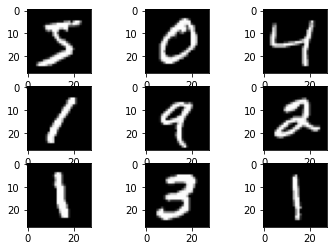

In [10]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train[i]), cmap=plt.get_cmap('gray'))
plt.show()

In [27]:
img_shape = X_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [13]:
#CNN
cnn=keras.Sequential([
    layers.Conv2D(filters=48,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 48)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 3ms/step - loss: 0.1428 - accuracy: 0.9548
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0596 - accuracy: 0.9820
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0355 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0268 - accuracy: 0.9911
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0218 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

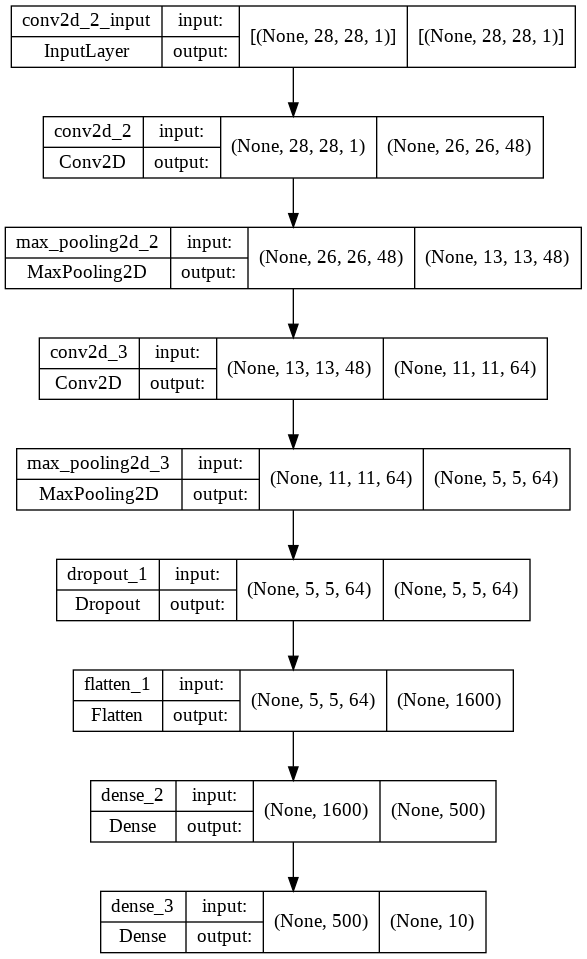

In [16]:
plot_model(cnn, show_shapes = True)

In [17]:
y_pred =cnn.predict(X_test)
y_pred[:5]

array([[7.77311863e-13, 3.51239621e-10, 1.88551119e-11, 6.52146284e-08,
        3.67933284e-09, 2.03346346e-13, 1.82883967e-18, 9.99999762e-01,
        2.55359539e-10, 8.52812221e-08],
       [7.35245130e-14, 4.21729096e-09, 1.00000000e+00, 5.63965865e-16,
        6.87277579e-12, 2.90270783e-21, 4.75055921e-14, 3.73936713e-15,
        5.40027814e-16, 7.29366836e-16],
       [3.05752923e-11, 9.99999881e-01, 7.74840678e-11, 2.02852770e-14,
        7.40540571e-08, 1.88122684e-10, 2.58218759e-11, 5.65674008e-10,
        1.30322082e-08, 8.94203375e-12],
       [9.99999881e-01, 1.95751206e-12, 2.33432662e-10, 8.21849611e-09,
        1.11583236e-10, 6.09568673e-10, 1.04312917e-07, 4.44644738e-11,
        1.17723942e-10, 5.30230650e-08],
       [4.64774139e-12, 6.92061478e-11, 2.50019339e-10, 1.67283329e-13,
        9.99999046e-01, 1.19438681e-10, 1.76096811e-11, 2.06677405e-12,
        4.54886753e-11, 9.22622576e-07]], dtype=float32)

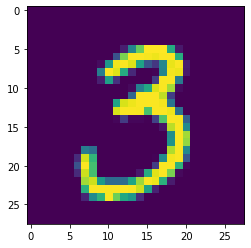

In [32]:
plt.imshow((tf.squeeze(X_test[90])))


In [33]:
print("The prediction is : ", np.argmax(y_pred[90]))

The prediction is :  3


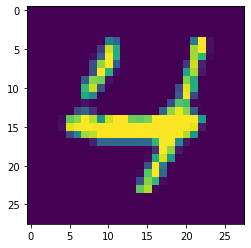

In [35]:
plt.imshow((tf.squeeze(X_test[6543])))

In [34]:
print("The prediction is : ", np.argmax(y_pred[6543]))

The prediction is :  4
